# Image storytelling with Azure Computer Vision and Azure OpenAI

In [1]:
import datetime
import openai
import os
import requests
import sys
import time

from dotenv import load_dotenv
from IPython.display import Image

In [2]:
sys.version

'3.10.10 (main, Mar 21 2023, 18:45:11) [GCC 11.2.0]'

In [3]:
print("Today:", datetime.datetime.today().strftime("%d-%b-%Y %H:%M:%S"))

Today: 09-Nov-2023 10:38:05


In [4]:
load_dotenv("azure.env")

# Azure Open AI
openai.api_type: str = "azure"
openai.api_key = os.getenv("OPENAI_API_KEY")
openai.api_base = os.getenv("OPENAI_API_BASE")
openai.api_version = os.getenv("OPENAI_API_VERSION")

print("Open AI version:", openai.__version__)

Open AI version: 0.28.1


## Functions

In [5]:
def get_tags(image_file):
    """
    Get caption from an image using Azure Computer Vision 4
    """
    # Get key and endpoint for Azure Computer Vision service
    load_dotenv("azure.env")
    key = os.getenv("azure_cv_key")
    endpoint = os.getenv("azure_cv_endpoint")

    # settings
    options = "&features=tags"
    model = "?api-version=2023-02-01-preview&modelVersion=latest"
    url = endpoint + "/computervision/imageanalysis:analyze" + model + options
    headers = {
        "Content-type": "application/octet-stream",
        "Ocp-Apim-Subscription-Key": key,
    }

    # Read the image file
    with open(image_file, "rb") as f:
        data = f.read()

    # Sending the requests
    response = requests.post(url, data=data, headers=headers)

    return response.json()

In [6]:
def get_summary(text):
    """
    Ask with Azure Open AI
    """
    prompt = "Summarize the following descriptions:" + text

    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=1000,
        temperature=0.7,
    )

    print("\033[1;31;32m", response["choices"][0]["text"].replace("\n", ""))

In [7]:
def get_story(text):
    """
    Ask with Azure Open AI
    """
    prompt = "Write a realistic story based on image descriptors:" + text

    response = openai.Completion.create(
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=1000,
        temperature=0,
    )

    print("\033[1;31;34m", response["choices"][0]["text"].replace("\n", ""))

## Testing

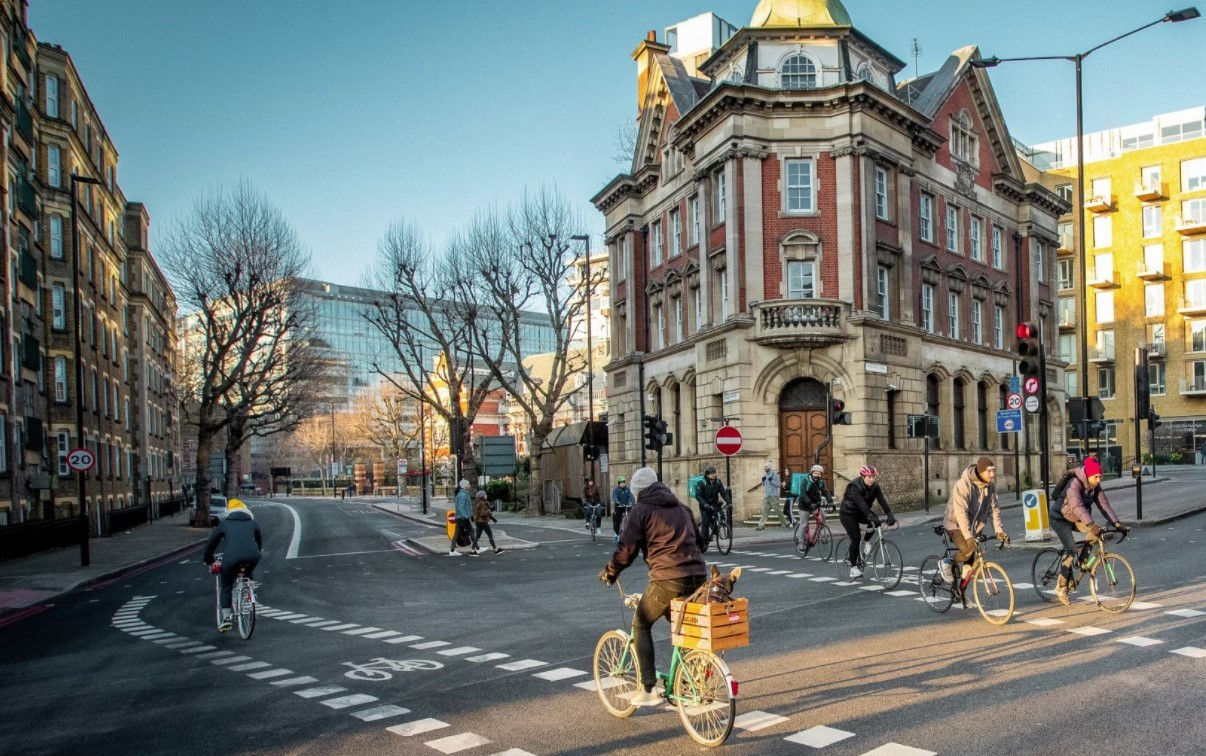

In [8]:
image = "image1.jpg"

Image(filename=image)

In [9]:
results = get_tags(image)
tags = results["tagsResult"]["values"]
tags

[{'name': 'outdoor', 'confidence': 0.999168872833252},
 {'name': 'building', 'confidence': 0.9910473823547363},
 {'name': 'road', 'confidence': 0.9782282114028931},
 {'name': 'sky', 'confidence': 0.9767833948135376},
 {'name': 'street', 'confidence': 0.9664872884750366},
 {'name': 'bicycle wheel', 'confidence': 0.9168390035629272},
 {'name': 'land vehicle', 'confidence': 0.9047792553901672},
 {'name': 'vehicle', 'confidence': 0.8851256370544434},
 {'name': 'pedestrian', 'confidence': 0.8809379935264587},
 {'name': 'town', 'confidence': 0.8585155010223389},
 {'name': 'lane', 'confidence': 0.8428648710250854},
 {'name': 'city', 'confidence': 0.7800885438919067},
 {'name': 'bicycle', 'confidence': 0.7626743316650391},
 {'name': 'way', 'confidence': 0.7023237943649292},
 {'name': 'person', 'confidence': 0.6829552054405212},
 {'name': 'people', 'confidence': 0.6704779863357544},
 {'name': 'bike', 'confidence': 0.4788716733455658},
 {'name': 'winter', 'confidence': 0.43758314847946167}]

In [10]:
tags_string = ", ".join(item["name"] for item in tags)
tags_string

'outdoor, building, road, sky, street, bicycle wheel, land vehicle, vehicle, pedestrian, town, lane, city, bicycle, way, person, people, bike, winter'

In [11]:
get_summary(tags_string)

 This is a description of various objects and entities related to outdoor environments, including buildings, roads, sky, streets, bicycle wheels, land vehicles, pedestrians, towns, lanes, cities, bicycles, ways, people, bikes, and winters.


In [12]:
get_story(tags_string)

 It was a cold winter day in the city. The sky was a deep blue, and the sun was shining brightly. The streets were bustling with people, cars, and bicycles.A young woman was walking down the street, bundled up in a thick coat and scarf. She was on her way to work, and she was in a hurry. As she walked, she noticed a bicycle wheel lying in the middle of the road. She stopped to take a closer look, and she realized it was a child's bike. She wondered how it had gotten there, and she felt a pang of sadness.Further down the street, she noticed a group of people gathered around a building. She stopped to see what was going on, and she realized they were protesting something. She couldn't make out what it was, but she could tell it was important.As she continued on her way, she noticed a lane of land vehicles parked along the side of the road. She realized they were all electric cars, and she smiled. It was nice to see the city embracing new technology.Finally, she reached her destination. S

## Another example

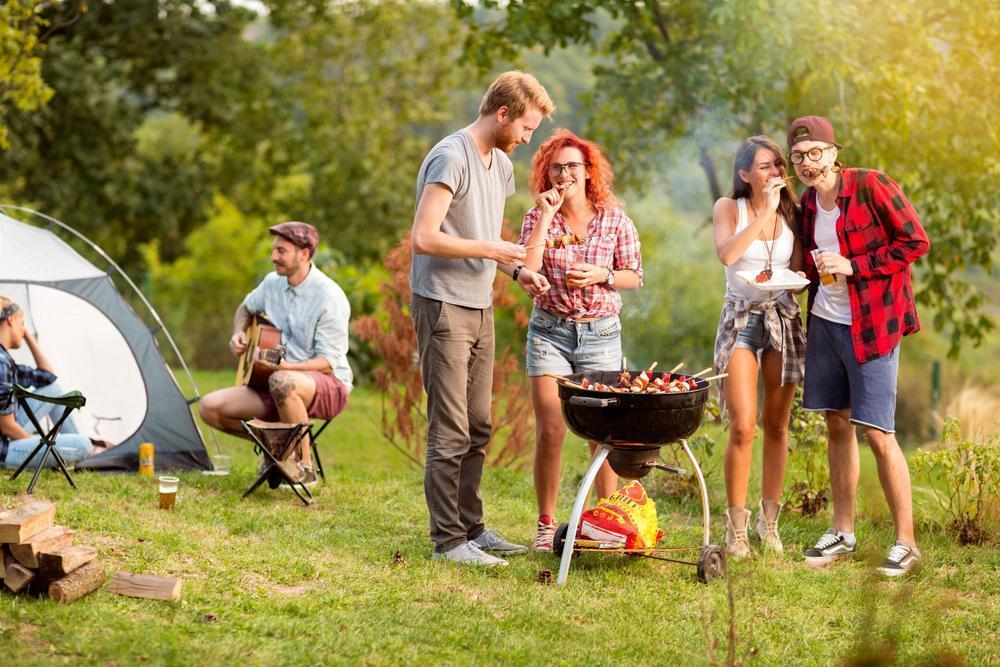

In [13]:
image = "image2.jpg"

Image(filename=image)

In [14]:
results = get_tags(image)
tags = results["tagsResult"]["values"]
tags_string = ", ".join(item["name"] for item in tags)
tags_string

'outdoor, clothing, grass, person, footwear, tree, people, picnic, plant, man, group, woman, standing, barbecue, food, summer'

In [15]:
get_summary(tags_string)

 During summer, people often gather in groups outdoors to enjoy the warm weather with a barbecue and picnic. People wear clothing appropriate for the grassy terrain, such as footwear, and they may stand near a tree or plant while eating their food. There is typically a mix of men and women in the group.


In [16]:
get_story(tags_string)

 It was a beautiful summer day and the sun was shining brightly. A group of people had gathered in a park for a picnic. The grass was lush and green and the trees provided a pleasant shade.The group consisted of a man, a woman, and several other people. They were all dressed in summer clothing, with the man wearing a pair of shorts and a t-shirt and the woman wearing a sundress. Everyone was wearing some kind of footwear, from sandals to sneakers.The group had set up a barbecue and were cooking up some delicious food. The smell of the food was tantalizing and the group was enjoying the warm summer air.The man and woman were standing near a large tree, talking and laughing. The other people in the group were scattered around the park, enjoying the picnic and the beautiful day. Some were playing games, while others were just relaxing and enjoying the company.The group had also brought some plants to decorate the area. They had placed them around the picnic area, adding a bit of color and

## Another example

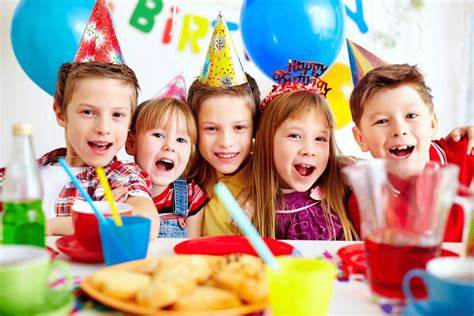

In [17]:
image = "image3.jpg"

Image(filename=image)

In [18]:
results = get_tags(image)
tags = results["tagsResult"]["values"]
tags_string = ", ".join(item["name"] for item in tags)
tags_string

'human face, party supply, birthday, person, toddler, indoor, clothing, party hat, smile, birthday cake, food, girl, balloon, party, child, boy'

In [19]:
get_summary(tags_string)

 A birthday party for a child can include a person wearing party clothing, such as a party hat, and a smile on their face. The party supplies can include a birthday cake, food, balloons, and a present for the toddler, either a boy or a girl.


In [20]:
get_story(tags_string)

 It was a special day for the family. It was the birthday of their youngest child, a toddler girl. Everyone was gathered in the living room, which was decorated with party supplies. The birthday girl was wearing a cute dress and a party hat, and she was beaming with joy.The birthday cake was placed in the center of the room, and it was surrounded by all kinds of food. There were chips, sandwiches, and other snacks. The birthday girl was so excited to see the cake that she couldn't contain her smile.The family was also joined by a few friends of the birthday girl. There were two boys and a girl, all dressed in their best party clothes. They were all laughing and having a great time.The birthday girl was presented with a few gifts, and she was so happy to receive them. She was also given a few balloons, which she happily held in her hands.The party went on for a few hours, and everyone had a great time. The birthday girl was so happy that she couldn't stop smiling. At the end of the part